# Ver el mundo desde tu casa: Tutorial introductorio a las imágenes satelitales $\to$ Las visualizaciones de datos.

En esta _jupyter notebook_ se encuentran las gráficas realizadas para el tutorial "Ver el mundo desde tu casa: Tutorial introductorio a las imágenes satelitales". El tutorial completo se encuentra aquí.

In [1]:
import numpy as np
import pandas as pd


Como pudimos ver, podemos realizar las gráficas de las series del tiempo en el _Code Editor_ de Earth Engine (EE), sin embargo creo que podemos visualizarlas de mejor manera con un poco de ayuda de **Python**

## Deforestación: Pérdidas anuales

Vamos a empezar con la manera más sencilla de graficar... con la ayuda de [**Matplotlib**](https://matplotlib.org) para unas gráficas de barras.

In [2]:
# Primero cargamos los datos 
df_bosques = pd.read_csv("./data/area_deforestacion_m2.csv").rename(columns = {'Unnamed: 0': 'Año', '[x]': 'm2'})
df_bosques.head()

,Año,m2
0,2001,"978,817,660.247"
1,2002,"893,300,498.36"
2,2003,"547,638,545.815"
3,2004,"1,250,835,956.27"
4,2005,"822,678,761.437"


Observamos que los datos de **m2** son _strings_, por lo que vamos a cambiarlosa números

In [3]:
df_bosques.m2 = pd.to_numeric(df_bosques.m2.str.replace(',',''), downcast='float')
df_bosques.head()

,Año,m2
0,2001,9.788177e+08
1,2002,8.933005e+08
2,2003,5.476385e+08
3,2004,1.250836e+09
4,2005,8.226788e+08


Podemos convertir los $\mathrm{m^2}$ a kilometros cuadrados ($\text{km}^2$): 

In [4]:
df_bosques['km2'] = df_bosques['m2'].apply(lambda x: x/1e6)
df_bosques.head()

,Año,m2,km2
0,2001,9.788177e+08,978.817664
1,2002,8.933005e+08,893.300480
2,2003,5.476385e+08,547.638528
3,2004,1.250836e+09,1250.835968
4,2005,8.226788e+08,822.678784


Con ese formato ahora vamos a crear nuestra gráfica de barras:

In [5]:
import matplotlib.pyplot as plt
plt.rc('font', family='serif')

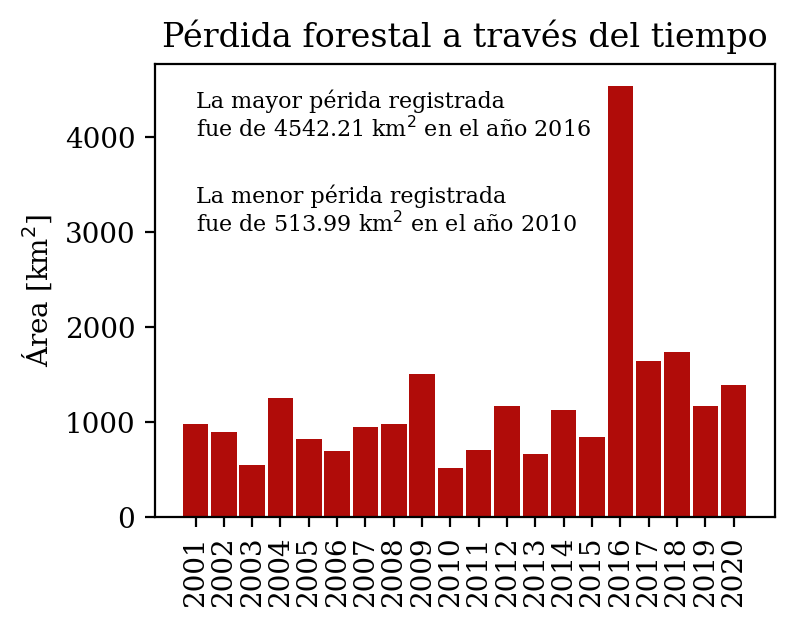

In [6]:
# Dimensión de la figura
plt.figure(figsize=(4,3), facecolor='white', dpi = 200)
plt.axes().set_facecolor('white')

# Creamos gráfica de barras
plt.bar(
    # Lo que va en el eje x
    x=df_bosques['Año'].values,
    # Altura de las barras
    height= df_bosques['km2'],
    # Ancho de las barras
    width=0.9,
    # Color en código HEX
    color = '#B00C09',
    # Grosor de líneas de contorno
    lw = 0.5
    )

# -> Agregamos información en la gráfica
#       Mayor pérdida
Idx_MayorPerdida = np.argmax(df_bosques['km2'].values)
#       Menor pérdida
Idx_MenorPerdida = np.argmin(df_bosques['km2'].values)
#       Agregmos un texto en la gráfica
            # Posición en x
plt.text(   x=2001,
            # Posición en y
            y=4000,
            # Texto
            s = f'La mayor périda registrada\nfue de {np.round(df_bosques.km2[Idx_MayorPerdida],2)} km$^2$ en el año {df_bosques["Año"][Idx_MayorPerdida]}',
            # Parámtros: Tamaño
            fontdict={'size':8}
            )
plt.text(   x=2001,
            # Posición en y
            y=3000,
            # Texto
            s = f'La menor périda registrada\nfue de {np.round(df_bosques.km2[Idx_MenorPerdida],2)} km$^2$ en el año {df_bosques["Año"][Idx_MenorPerdida]}',
            # Parámtros: Tamaño
            fontdict={'size':8}
            )

plt.title(r'Pérdida forestal a través del tiempo')
plt.ylabel(r'Área [km$^2$]')
plt.xticks([i for i in range(2001,2021)], rotation=90)
plt.show()

## Temperatura de la superficie: Serie de tiempo  

Observar los cambios a través del tiempo es interesante de proyectar, la manera más común, fácil y efectiva de hacerlo es a través de una línea. Con esta manera de visualizar los datos podemos encontrar patrones y si contamos con un buen ojo hasta se podemos **aproximar** una predicción.

In [7]:
df_temp = pd.read_csv('data/temperatura.csv').rename(columns={'system:time_start':'Fecha', 'LST_Day_1km':'Temperatura'})
df_temp

,Fecha,Temperatura
0,"Jan 1, 2016",24.293
1,"Jan 2, 2016",29.312
2,"Jan 3, 2016",29.960
3,"Jan 4, 2016",30.811
4,"Jan 5, 2016",31.530
...,...,...
1812,"Dec 26, 2020",23.537
1813,"Dec 27, 2020",27.059
1814,"Dec 28, 2020",24.403
1815,"Dec 29, 2020",NaN


In [8]:
# Convertimos Fecha a un formato de tiempo
df_temp['Fecha'] = pd.to_datetime(df_temp.Fecha)

# Eliminamos los valores NaN
df_temp.dropna(inplace=True)

df_temp

,Fecha,Temperatura
0,2016-01-01,24.293
1,2016-01-02,29.312
2,2016-01-03,29.960
3,2016-01-04,30.811
4,2016-01-05,31.530
...,...,...
1811,2020-12-25,24.164
1812,2020-12-26,23.537
1813,2020-12-27,27.059
1814,2020-12-28,24.403


Vamos a graficar una serie de tiempo de la manera más sencilla: **una línea**

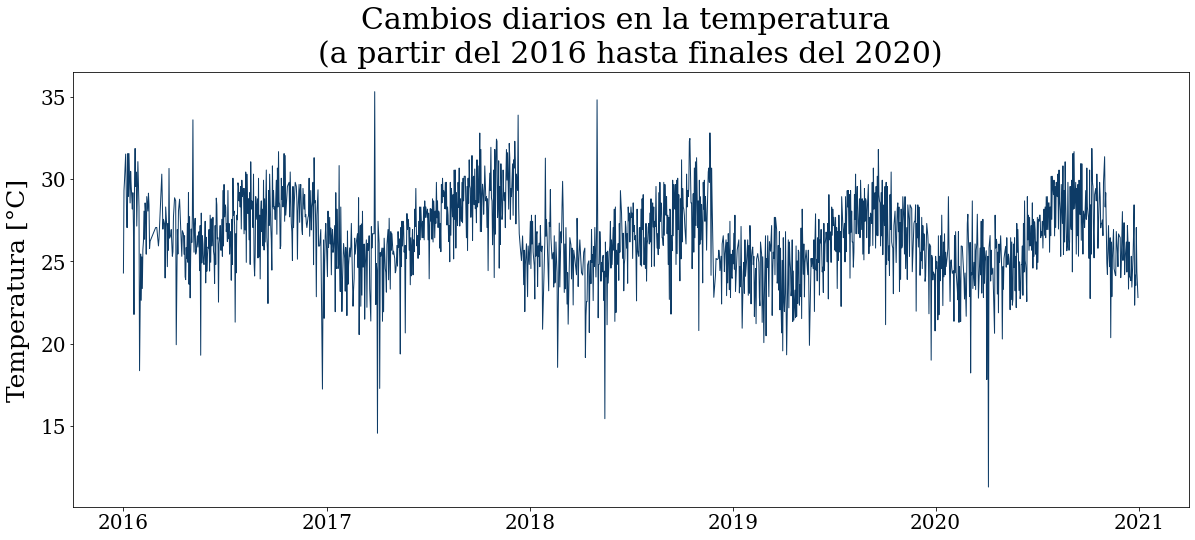

In [9]:
plt.figure(figsize=(20,8))

# Graficamos una linea sencilla
plt.plot(
    # Valores del eje x
    df_temp.Fecha,
    # Valores del eje y
    df_temp.Temperatura,
    # Color de la línea
    color = '#0D3B66',
    # Grosor de la línea
    lw=1)

plt.title(
    # Texto del título
    'Cambios diarios en la temperatura \n(a partir del 2016 hasta finales del 2020)',
    # Tamaño del título
    size = 30,
    # Separación de la figura
    pad=10
    )

# Modificar eje y
plt.ylabel(
    # Nombre del eje
    'Temperatura [°C]',
    # Tamaño del texto
    size = 25,
    # Separación de la figura
    labelpad=10
     )

# Modificar el tamaño de los valores de los ejes
plt.tick_params(labelsize = 20)

A pesar de que el objetivo de ver como cambia la temperatura a través del tiempo se cumple, parece ser una señal con mucho ruido, no se puede apreciar bien. Una opción es mejor agrupar los datos por semanas o por meses

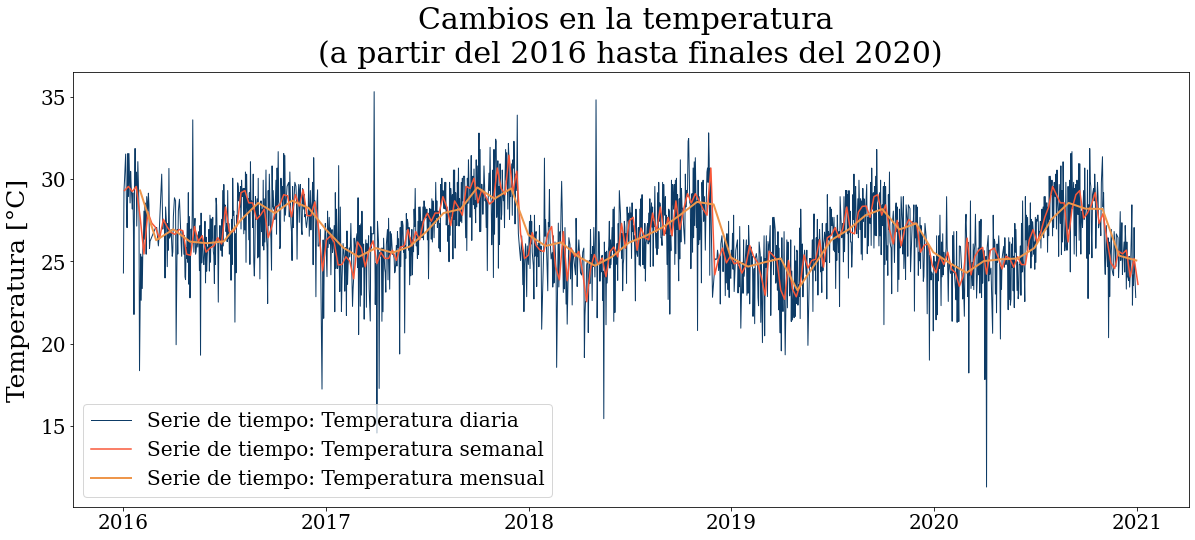

In [10]:
# Agrupamos por la temperatura mediana de la semana
df_temp_semana = df_temp.set_index(df_temp.Fecha).resample('w').median()

# Agrupamos por la temperatura media del mes
df_temp_mes = df_temp.set_index(df_temp.Fecha).resample('M').median()

plt.figure(figsize=(20,8))

plt.plot(
    df_temp.Fecha, df_temp.Temperatura, color = '#0D3B66', lw=1,
    # Nombre de la línea
    label = 'Serie de tiempo: Temperatura diaria'
    )
plt.plot(
    df_temp_semana.Temperatura, color = '#F95738', lw=1.5,
    label = 'Serie de tiempo: Temperatura semanal'
    )
plt.plot(
    df_temp_mes.Temperatura, color = '#EE964B', lw=2,
    label = 'Serie de tiempo: Temperatura mensual'
    )

# Mostrar la leyenda
plt.legend(
    # La mejor posición
    loc = 'best',
    # Propiedades: Tamaño
    prop = {'size':20}
)
plt.title('Cambios en la temperatura \n(a partir del 2016 hasta finales del 2020)',size = 30, pad=10)
plt.ylabel('Temperatura [°C]', size = 25, labelpad=10)
plt.tick_params(labelsize = 20)

Esta manera de visualizar es un poco más clara, pero creo que se puede hacer mejor. Para la siguiente tarea vamos a usar **`df_temp_mes`**

In [11]:
# -> Vamos a crear 2 columnas más:
#       Año
df_temp_mes['Año'] = df_temp_mes.reset_index().Fecha.dt.year.values
#       Mes
df_temp_mes['Mes'] = df_temp_mes.reset_index().Fecha.dt.month.values
#       Cambiamos al nombre de los meses
Lista_Meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May','Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic' ]

# Haremos un datafrma pivoteado
df_temp_mes_pivot = df_temp_mes.pivot("Mes", "Año", "Temperatura")
df_temp_mes_pivot.head()

Año,2016,2017,2018,2019,2020
Mes,,,,,
1,29.3120,25.8440,25.9410,24.681,24.8695
2,26.2885,25.2770,26.1565,24.932,24.3085
3,26.9485,25.8120,25.2945,25.179,25.0190
4,26.2025,25.5290,24.7350,23.250,25.1255
5,26.1045,25.9005,25.2850,24.798,25.1765


El siguiente paso es crear un Mapa de calor o _Heat map_ con ayuda de [**Seaborn**](https://seaborn.pydata.org):

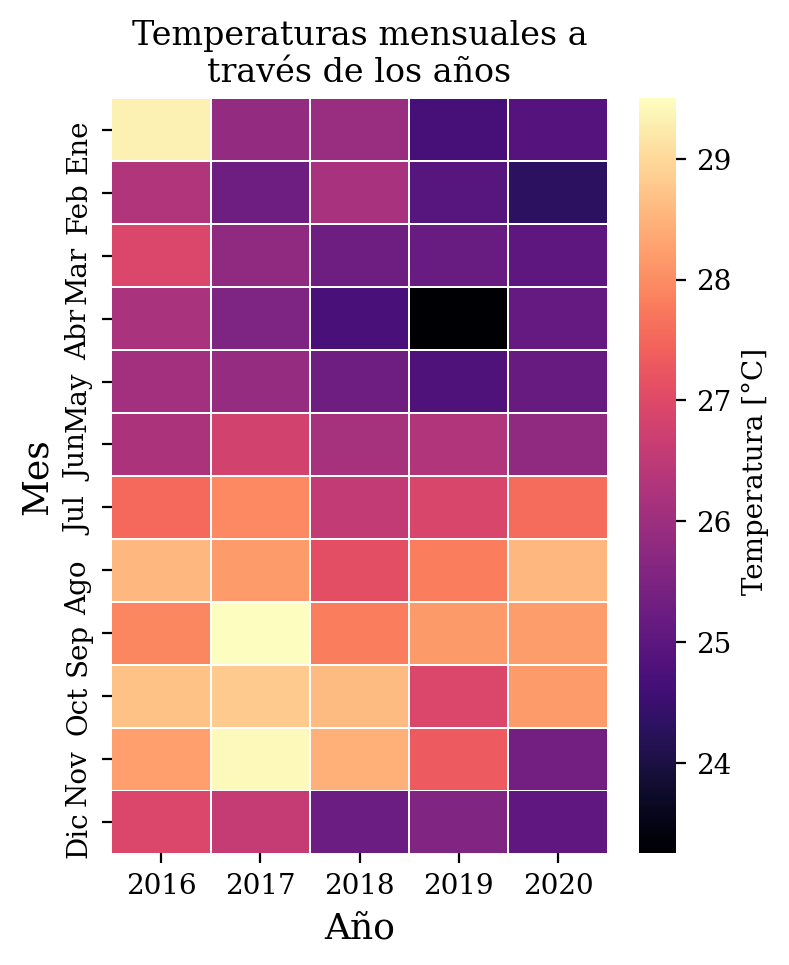

In [12]:
import seaborn as sns

# Creamos una figura
fig,ax = plt.subplots(figsize = (4,5), facecolor = 'white',dpi=200)
heatmap = sns.heatmap(
    # El data frame a usar 
    df_temp_mes_pivot,
    # Los meses en el eje y (que ya no sean números) 
    yticklabels= Lista_Meses,
    # Grosor de los separadores de cuadros 
    lw = 0.3,
    # Axis en el que estará 
    ax=ax,
    # Paleta de colores
    cmap='magma',
    # Parámetros para la barra de color 
    cbar_kws={'label': ' Temperatura [°C]'},
    )
# Damos nombre y tamaño a los ejes
ax.set_xlabel('Año', size = 13)
ax.set_ylabel('Mes', size = 13)
ax.set_title('Temperaturas mensuales a\ntravés de los años')

plt.show()

¿Mejor verdad? No siempre una línea tiene que ser la manera en la que vemos los cambios en el tiempo, hay otras opciones.

## Precipitación del agua: Serie del tiempo

No quiero que piensen que jamás volvamos a usar las líneas, el objetivo es presentar información de otras formas. Otro ejemplo es comparar las series de tiempo. 

Lo que haremos con los datos de la lluvia, será graficar la precipitación de todo el año de cada año diferente, es decir, una línea para el año 2016, otra para el 2017 y así hasta el final. Hacer esto en **`matplotlib`** es un poco complicado, para esta tarea usaremos [**Plotly**](https://plotly.com/python/). Una librería de Python que nos facilita la creación de gráficas interactivas.

In [13]:
df_lluvias = pd.read_csv("./data/precipitacion.csv").rename(columns={'system:time_start':'Fecha', 'precipitation':'Precipitacion'})

# Convertimos Fecha a un formato de tiempo
df_lluvias['Fecha'] = pd.to_datetime(df_lluvias.Fecha)

# Conocemos la semana y el año del dato
df_lluvias['Semana'] = df_lluvias['Fecha'].dt.isocalendar().week.values
df_lluvias['Año'] = df_lluvias['Fecha'].dt.year.values

# Eliminamos las semanas 53
df_lluvias = df_lluvias[ df_lluvias['Semana']!= 53 ]

# Hacemos la fecha un índice
df_lluvias = df_lluvias.set_index(df_lluvias.Fecha).drop(columns='Fecha')

# Eliminamos los valores NaN
df_lluvias.dropna(inplace=True)

# Agrupamos por semana
df_lluvias = df_lluvias.resample('w').median()

# Dejamos todos los años como enteros
df_lluvias['Año'] = df_lluvias['Año'].apply(int)

df_lluvias.head()


,Precipitacion,Semana,Año
Fecha,,,
2016-01-10,7.0200,1.0,2016
2016-01-17,13.3365,2.0,2016
2016-01-24,4.9490,3.0,2016
2016-01-31,30.3440,4.0,2016
2016-02-07,27.2830,5.0,2016


In [14]:
# Graficamos con plotly
import plotly.express as px

In [15]:
# Definimos una lista de colores 
List_Colores_Lluvia = ['#ffbe0b', '#fb5607', '#ff006e', '#8338ec', '#3a86ff']

fig = px.line(
    # Seleccionamos el data frame de nuestra eleccion
    df_lluvias, 
    # Lo que se graficará en el eje x
    x = "Semana",
    # Lo que se graficará en el eje y
    y = "Precipitacion",
    # Agruparemos por año y a cada año se le asigna un color diferente
    color = "Año", 
    # El título de nuestra gráfica
    title = 'Precipitación semanal por cada año',
    # Los colores de nuestras líneas
    color_discrete_sequence = List_Colores_Lluvia
    )
# Mostramos la gráfica
fig.show()

De esta manera podemos visualizar y comparar la precipitación de una determinada semana en años diferentes. Muy útil, ¿no?

## Agradecimientos

Toda esta información fue gracias a la docuemtnación de cada librería, ahí pueden encontrar otros tipo de visualizaciones y más información.